In [1]:
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt

import datasets

In [2]:
dataset = datasets.load_dataset("uvci/Koumankan_mt_dyu_fr")

len(dataset)

3

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['ID', 'translation'],
        num_rows: 8065
    })
    validation: Dataset({
        features: ['ID', 'translation'],
        num_rows: 1471
    })
    test: Dataset({
        features: ['ID', 'translation'],
        num_rows: 1393
    })
})

In [4]:
train, val, test = dataset["train"], dataset["validation"], dataset["test"]

In [5]:
train[0]

{'ID': 'ID_18897661270129',
 'translation': {'dyu': 'A bi ji min na', 'fr': 'Il boit de l’eau.'}}

In [6]:
val[0]

{'ID': 'ID_17914990255818',
 'translation': {'dyu': 'I tɔgɔ bi cogodɔ',
  'fr': 'Tu portes un nom de fantaisie.'}}

In [7]:
test[0]

{'ID': 'ID_17345911362699',
 'translation': {'dyu': 'An kelen duron le tun be yi', 'fr': '0'}}

In [8]:
type(train[0]["translation"])

dict

In [9]:
train.features.type

StructType(struct<ID: string, translation: struct<dyu: string, fr: string>>)

In [10]:
val.features.type

StructType(struct<ID: string, translation: struct<dyu: string, fr: string>>)

In [11]:
test.features.type

StructType(struct<ID: string, translation: struct<dyu: string, fr: string>>)

In [12]:
train_df = pd.DataFrame([
    {
        "ID": example["ID"], "dyu": example["translation"]["dyu"], "fr": example["translation"]["fr"]
	} for example in train
])

test_df = pd.DataFrame([
    {
        "ID": example["ID"], "dyu": example["translation"]["dyu"], "fr": example["translation"]["fr"]
	} for example in test
])

val_df = pd.DataFrame([
    {
        "ID": example["ID"], "dyu": example["translation"]["dyu"], "fr": example["translation"]["fr"]
	} for example in val
])

In [13]:
train_df.sample(10)

,ID,dyu,fr
3342,ID_19022636742103,ni sariya tɛ jaman ta ye,La règle n'est pas d'ordre public.
6652,ID_18408044198105,A bi tara Kimpe .,Elle va à Quimper.
4473,ID_17486933478866,n bɛ na na tɛnɛ lo.,je viendrai lundi.
6589,ID_18856244192123,A ka anivɛrsɛr le kun.,C’était son anniversaire.
638,ID_17437643822242,Wulumuso deni,une petite chienne.
3495,ID_18787774982779,A ya livru lo wa?,C’est votre livre ?
2687,ID_19424584920202,kɔlon min bɛ boɲɛ duuru bɔ,"Puis, du au sur La Cinq."
3457,ID_18070720980678,Pol Renuwar ka sira tan.,dix rue Paul Renouard
1900,ID_17527005698215,o ye n minɛ amandeman fila kan o min bɛ ye kee...,"Je suis saisi de deux amendements identiques, ..."
1218,ID_18034547821508,lagaris ra karɔs,"Chemin de Lagarigue, Cayrols"


In [14]:
train_df["dyu_len"] = train_df["dyu"].apply(lambda x: len(x))
train_df["dyu_split"] = train_df["dyu"].apply(lambda x: len(x.split()))
train_df["fr_len"] = train_df["fr"].apply(lambda x: len(x))
train_df["fr_split"] = train_df["fr"].apply(lambda x: len(x.split()))


train_df.sample(7)

,ID,dyu,fr,dyu_len,dyu_split,fr_len,fr_split
5786,ID_19253860363559,a fatɔyala ka tog'a kolokolo komi fatɔ,Elle délire et rampe comme un serpent.,38,7,38,7
426,ID_17460316697117,A ti foyi dian,Il ne me donne jamais rien.,14,4,27,6
4959,ID_17368300077032,Kôrô yan magni,le temps n'est pas beau.,14,3,24,5
1137,ID_17355887169448,A bi mɔgɔ bonya kojugu.,Il est plus respectueux.,23,5,24,4
1118,ID_17344580815833,Ne tɔgɔ ko Keraotre .,Je m'appelle Keraotred.,21,5,23,3
3689,ID_18475593956896,Na sisansisan,Viens tout de suite.,13,2,20,4
1243,ID_18896095229234,A y'a ka dususuma sɔrɔ ka ta o tuman na ɛspera...,Elle reprit sa douce humeur à mesure qu'Espéra...,66,16,68,11


In [15]:
train_df.describe()

,dyu_len,dyu_split,fr_len,fr_split
count,8065.000000,8065.000000,8065.000000,8065.000000
mean,25.568258,5.977557,32.481587,5.691631
std,13.911661,3.083352,18.165819,2.808012
min,2.000000,1.000000,4.000000,1.000000
25%,17.000000,4.000000,22.000000,4.000000
50%,22.000000,5.000000,26.000000,5.000000
75%,30.000000,7.000000,32.000000,6.000000
max,123.000000,29.000000,121.000000,19.000000


In [16]:
(train_df["fr_len"] - train_df["dyu_len"]).describe()

count    8065.000000
mean        6.913329
std        14.529102
min       -65.000000
25%        -1.000000
50%         4.000000
75%        10.000000
max        92.000000
dtype: float64

In [17]:
(train_df["fr_split"] - train_df["dyu_split"]).describe(
    [0.05, .1, .25, .75, .85, .9, .95]
)

count    8065.000000
mean       -0.285927
std         2.770949
min       -21.000000
5%         -4.000000
10%        -3.000000
25%        -2.000000
50%         0.000000
75%         1.000000
85%         2.000000
90%         3.000000
95%         4.000000
max        13.000000
dtype: float64

In [18]:
dyu_words = [
	word.lower() for i in train_df["dyu"] for word in i.split()
]

fr_words = [
	word.lower() for i in train_df["fr"] for word in i.split()
]

len(dyu_words), len(fr_words)

(48209, 45903)

In [19]:
dyu_words = pd.Series(dyu_words, name="dyu_words")
fr_words = pd.Series(fr_words, name="fr_words")

In [20]:
HEAD = 30

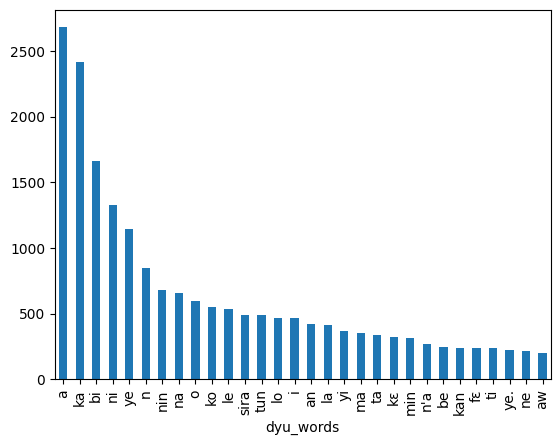

In [21]:
dyu_words.value_counts().head(HEAD).plot.bar()
plt.show()

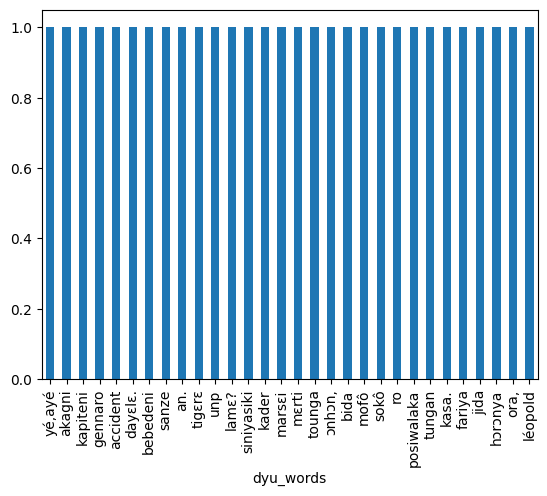

In [22]:
dyu_words.value_counts().tail(HEAD).plot.bar()
plt.show()

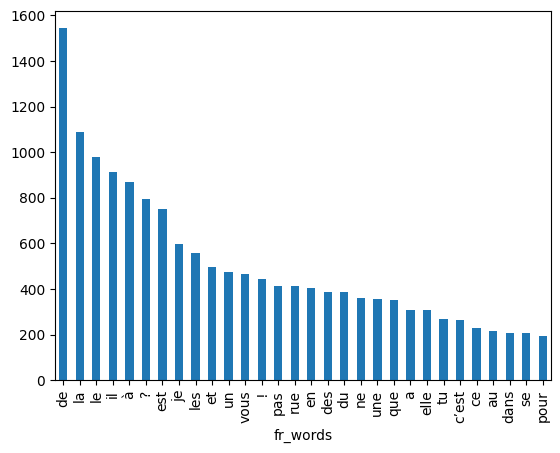

In [23]:
fr_words.value_counts().head(HEAD).plot.bar()
plt.show()

In [24]:
char_dyu = [
    tok for word in dyu_words for tok in word
]

char_fr = [
    tok for word in fr_words for tok in word
]

len(char_fr), len(char_dyu)

(224125, 166064)

In [25]:
char_fr = pd.Series(char_fr, name="char_fr")
char_dyu = pd.Series(char_dyu, name="char_dyu")

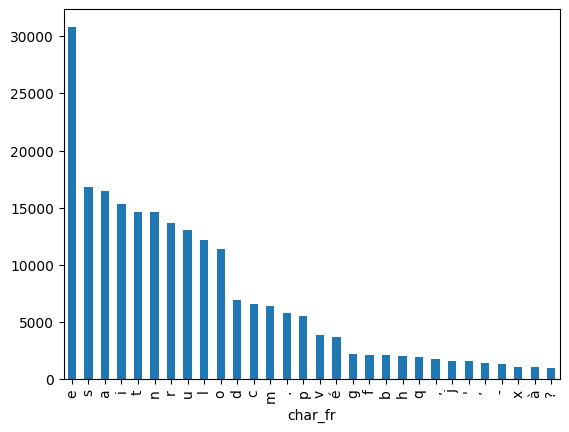

In [26]:
char_fr.value_counts().head(HEAD).plot.bar()
plt.show()

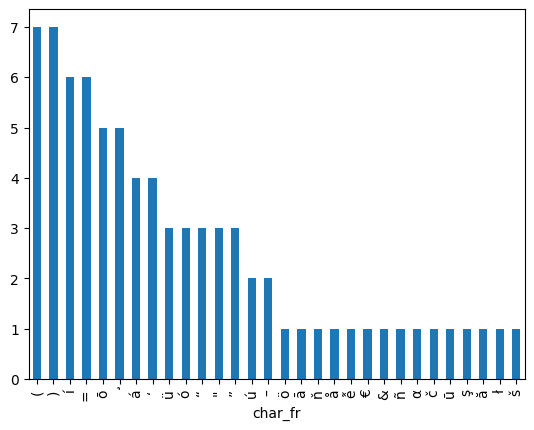

In [27]:
char_fr.value_counts().tail(HEAD).plot.bar()
plt.show()

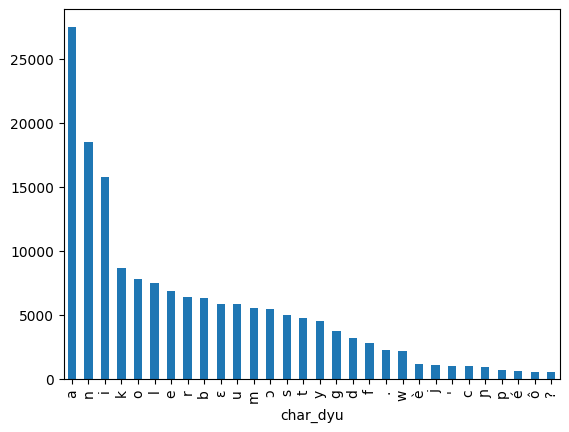

In [28]:
char_dyu.value_counts().head(HEAD).plot.bar()
plt.show()

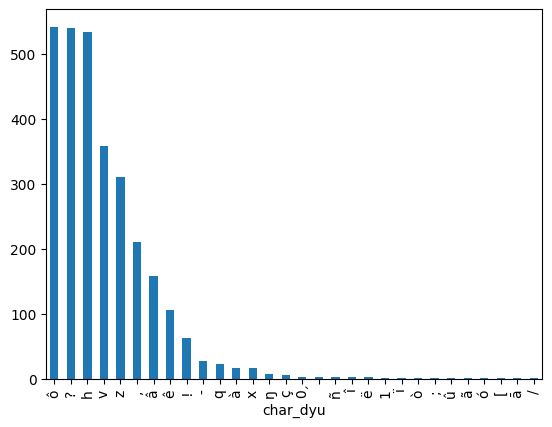

In [29]:
char_dyu.value_counts().tail(HEAD).plot.bar()
plt.show()

In [30]:
len(char_dyu.value_counts()), len(char_fr.value_counts())

(58, 86)